In [306]:
import requests
import pandas as pd
pd.options.display.max_columns = 200
import matplotlib.pyplot as plt
import matplotlib
import datetime

In [307]:
tables = pd.read_html('https://finance.naver.com/sise/sise_index_day.nhn?code=KOSDAQ&page=1')
#print(tables[0])

df = pd.DataFrame(tables[0], columns=['날짜','체결가','거래량(천주)','거래대금(백만)'])
print(df)

            날짜     체결가    거래량(천주)    거래대금(백만)
0          NaN     NaN        NaN         NaN
1   2020.07.09  772.90  1465602.0  10387777.0
2   2020.07.08  765.96  1306346.0  10447531.0
3   2020.07.07  759.16  1290021.0  10083403.0
4          NaN     NaN        NaN         NaN
5          NaN     NaN        NaN         NaN
6          NaN     NaN        NaN         NaN
7          NaN     NaN        NaN         NaN
8   2020.07.06  759.90  1142167.0   8304840.0
9   2020.07.03  752.18  1285378.0  10147594.0
10  2020.07.02  742.55  1155544.0   7539546.0
11         NaN     NaN        NaN         NaN
12         NaN     NaN        NaN         NaN


In [308]:
input_page = input("추출하고자 하는 마지막 페이지 입력 : ")

end_page = int(input_page)
print("추출하는 마지막 페이지 : ", end_page)

latest_page = 0

추출하고자 하는 마지막 페이지 입력 : 183
추출하는 마지막 페이지 :  183


In [309]:
# 크롤링 시작
for i in range(2, end_page+1):
    url=f'https://finance.naver.com/sise/sise_index_day.nhn?code=KOSDAQ&page={i}'
    tmp_tables = pd.read_html(url)
    tmp_df = pd.DataFrame(tmp_tables[0], columns=['날짜','체결가','거래량(천주)','거래대금(백만)'])
    df = df.append(tmp_df)

In [310]:
# 데이터 전처리 시작
# 빈 행 제거
df=df.dropna()
# 인덱싱 새로하기
df=df.reset_index(drop=True)
df.head(10)

,날짜,체결가,거래량(천주),거래대금(백만)
0,2020.07.09,772.90,1465602.0,10387777.0
1,2020.07.08,765.96,1306346.0,10447531.0
2,2020.07.07,759.16,1290021.0,10083403.0
3,2020.07.06,759.90,1142167.0,8304840.0
4,2020.07.03,752.18,1285378.0,10147594.0
5,2020.07.02,742.55,1155544.0,7539546.0
6,2020.07.01,727.58,1184777.0,8563272.0
7,2020.06.30,737.97,1638598.0,10528654.0
8,2020.06.29,734.69,1347220.0,9278719.0
9,2020.06.26,750.58,1522033.0,11787915.0


In [311]:
# 날짜 열 데이터변환
df["날짜"] = pd.to_datetime(df["날짜"])
df.dtypes

날짜          datetime64[ns]
체결가                float64
거래량(천주)            float64
거래대금(백만)           float64
dtype: object

In [318]:
df["요일"] = df["날짜"].dt.dayofweek

In [320]:
df

,날짜,체결가,거래량(천주),거래대금(백만),요일
0,2020-07-09,772.90,1465602.0,10387777.0,3
1,2020-07-08,765.96,1306346.0,10447531.0,2
2,2020-07-07,759.16,1290021.0,10083403.0,1
3,2020-07-06,759.90,1142167.0,8304840.0,0
4,2020-07-03,752.18,1285378.0,10147594.0,4
...,...,...,...,...,...
1093,2016-01-25,681.43,453831.0,3025347.0,0
1094,2016-01-22,670.95,542909.0,3389378.0,4
1095,2016-01-21,665.84,568732.0,3253867.0,3
1096,2016-01-20,669.68,743366.0,4433057.0,2


In [321]:
#요일 데이터 문자로 변환
def transfer_day(day_num):
    # 0=월, 1=화 ... 4=금
    if day_num==0:
        return '월'
    elif day_num==1:
        return '화'
    elif day_num==2:
        return '수'
    elif day_num==3:
        return '목'
    elif day_num==4:
        return '금'
    else:
        print("이상값 발견")

In [324]:
df["요일"] = df["요일"].apply(transfer_day)

In [325]:
df

,날짜,체결가,거래량(천주),거래대금(백만),요일
0,2020-07-09,772.90,1465602.0,10387777.0,목
1,2020-07-08,765.96,1306346.0,10447531.0,수
2,2020-07-07,759.16,1290021.0,10083403.0,화
3,2020-07-06,759.90,1142167.0,8304840.0,월
4,2020-07-03,752.18,1285378.0,10147594.0,금
...,...,...,...,...,...
1093,2016-01-25,681.43,453831.0,3025347.0,월
1094,2016-01-22,670.95,542909.0,3389378.0,금
1095,2016-01-21,665.84,568732.0,3253867.0,목
1096,2016-01-20,669.68,743366.0,4433057.0,수


In [326]:
#df.groupby("요일").mean()
result = pd.DataFrame(df.groupby("요일").mean())

In [327]:
format = lambda x: '%.2f' % x
result["체결가"] = result["체결가"].map(format)
result["거래량(천주)"] = result["거래량(천주)"].map(format)
result["거래대금(백만)"] = result["거래대금(백만)"].map(format)

In [332]:
# 데이터타입 변경
result["체결가"]=pd.to_numeric(result["체결가"])
result["거래량(천주)"]=pd.to_numeric(result["거래량(천주)"])
result["거래대금(백만)"]=pd.to_numeric(result["거래대금(백만)"])
result.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5 entries, 금 to 화
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   체결가       5 non-null      float64
 1   거래량(천주)   5 non-null      float64
 2   거래대금(백만)  5 non-null      float64
dtypes: float64(3)
memory usage: 160.0+ bytes


In [333]:
result1 = result['체결가']

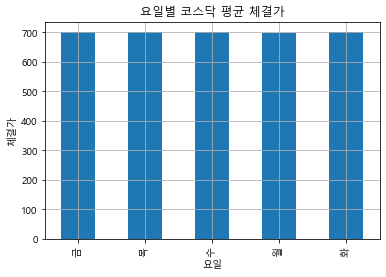

In [334]:
# 막대그래프 시각화
matplotlib.rcParams['font.family'] = 'Malgun Gothic'


bar = result1.plot.bar(grid=True)
bar.set_xlabel("요일")
bar.set_ylabel("체결가")
bar.set_title("요일별 코스닥 평균 체결가")
plt.show()

In [281]:
import openpyxl

In [335]:
df.to_excel('data/cosdaq.xlsx')